## Astronomy 406 "Computational Astrophysics" (Fall 2016)

### Week 5: Statistical description of data

<b>Reading:</b> notes below, as well as $\S$[14.1](https://umich.instructure.com/files/2565545/download?download_frd=1) of [Numerical Recipes](http://numerical.recipes).

In [1]:
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Now we begin to explore statistical properties of real-life data sets.  Suppose we have an array of measurements of some real object, for example, the height of students in this class, or in the whole University of Michigan.  Assume we have $n$ measurements $x_i$ that are independent of each other.

Let's generate a sample of 100 points and plot it as a histogram.  We will be using a useful set of histogram options from the <b>astroML</b> library.  Make sure you have it installed with your Python distribution (see http://www.astroml.org/user_guide/installation.html).

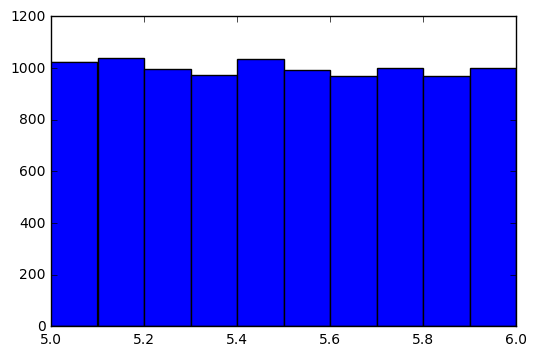

In [2]:
np.random.seed(0) #constant seed, so each time we run this it will be identical
x = 5 + np.random.random(10000)

plt.hist(x)
plt.show()

Now the [astroML histogram](http://www.astroml.org/book_figures/chapter5/fig_hist_binsize.html):

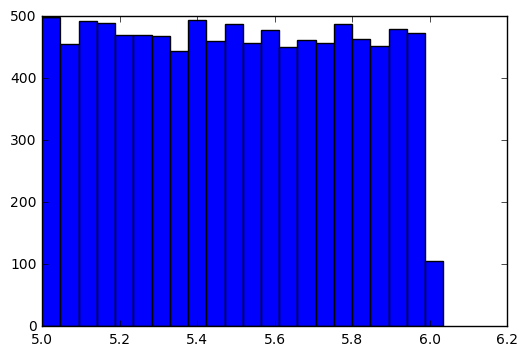

In [3]:
from astroML.plotting import hist
hist(x, bins='scotts')
plt.show()

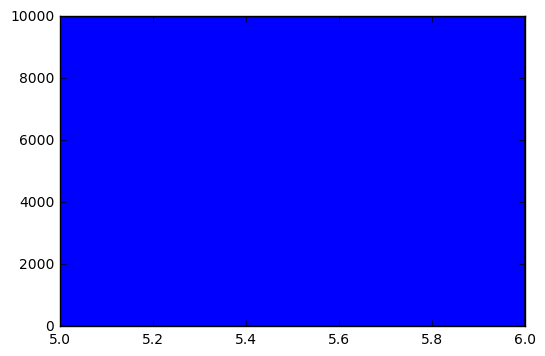

In [4]:
hist(x, bins='knuth')
plt.show()

#Each different routine uses different methods for choosing the size and number of bins.
#All of these are better than the traditional matplotlib histogram:
#Scotts is good for gaussians, freedman for gaussian with outlying peaks, 
#and knuth is good for general distributions.

The <i>mean</i> of the sample is defined as
$\bar{x} = {1\over n} \sum_{i=0}^{n-1} x_i$.

The <i>variance</i> of the sample is defined as
$Var = {1\over n-1} \sum_{i=0}^{n-1} (x_i - \bar{x})^2$.

The <i>standard deviation</i> is 
$\sigma = \sqrt{Var}$.

Higher order moments of the distribution, such as the <i>skewness</i> and <i>kurtosis</i>, are defined in $\S$14.1 of NR.

The <i>median</i> is defined as the point right in the middle of a sorted (monotonically increasing, or decreasing) sample: $x_{\rm med} = x_{(n-1)/2}$. (For even number of points - $x_{\rm med} = {(x_{(n-1)/2} + x_{n/2})\over2}$.)

<b>Exercise:</b> What do you expect the mean of our sample to be?  The standard deviation?

In [5]:
print "mean =", np.mean(x)
print "st_dev =", np.std(x)
print "median =", np.median(x)

mean = 5.49645889162
st_dev = 0.28959110344
median = 5.49350103036


Now let's take a different sample.  It will be generated from a normal (also often called Gaussian) distribution, with zero mean ($\mu=0$) and standard deviation $\sigma=1$. 

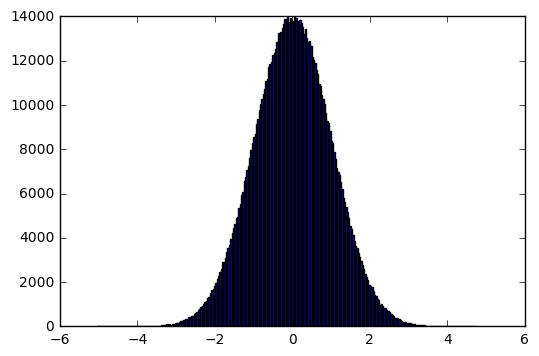

In [6]:
x2 = np.random.normal(0, 1, 1000000)
#plt.hist(x2)
hist(x2, bins = "scott")
plt.show()

In [7]:
print "mean =", np.mean(x2)
print "st_dev =", np.std(x2)
print "median =", np.median(x2)

mean = 0.00154776210892
st_dev = 0.999998489496
median = 0.00257784499322


<b>Exercise:</b> These numbers are not exactly equal to $\mu$ and $\sigma$ used to generate the sample.  Why?

error for n = 1: mean = 4.60e-02 st_dev = 6.17e-02
error for n = 2: mean = 3.90e-02 st_dev = 2.77e-02
error for n = 3: mean = 1.30e-02 st_dev = 5.00e-03
error for n = 4: mean = 8.47e-03 st_dev = 2.90e-03
error for n = 5: mean = 9.92e-04 st_dev = 3.70e-03
error for n = 6: mean = 1.51e-04 st_dev = 3.26e-04
error for n = 7: mean = 1.50e-04 st_dev = 3.06e-04


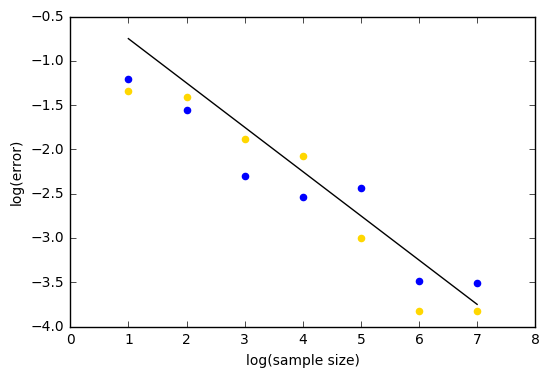

In [8]:
MeanErrors = []
StdErrors = []
for n in np.arange(1, 8):
    y = np.random.normal(0, 1, 10**n)
    MeanErrors.append(np.fabs(np.mean(y) - 0.))
    StdErrors.append(np.fabs(np.std(y) - 1.))
    print 'error for n = %d: mean = %.2e st_dev = %.2e' %(n, np.fabs(np.mean(y) - 0.), 
                                                         np.fabs(np.std(y) - 1.))
plt.scatter(np.arange(1, 8), np.log10(np.array(MeanErrors)), color = 'gold')
plt.scatter(np.arange(1, 8), np.log10(np.array(StdErrors)), color = 'blue')
plt.plot(np.arange(1, 8), -0.5 * np.arange(1, 8) - .25, 'black')
plt.xlabel('log(sample size)')
plt.ylabel('log(error)')


So, as log(error) = a * log(n), error = n^a. This follows a general rule in statistics - error is proportional to 1/sqrt(n) (Conservative error estimate).
If we need a sorted array, we can use the built-in function with the intuitive name <b>sorted</b>:

In [9]:
xs = sorted(x)

Let's plot three Gaussian functions with same mean but different standard deviations.  This is an example from <b>astroML</b> figure 3.8.  You can see the source on their website, http://www.astroml.org/book_figures/chapter3/.

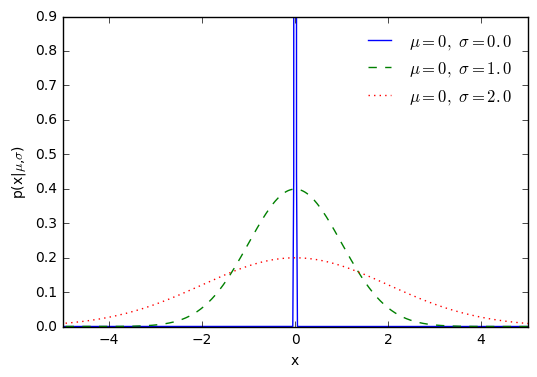

In [10]:
sigma_values = [0.01, 1.0, 2.0]
linestyles = ['-', '--', ':']
mu = 0
x = np.linspace(-10, 10, 1000)

for sig, ls in zip(sigma_values, linestyles): #zip takes the first elements of each array - it is a way to draw values from parallel arrays simultaneously
    dist = stats.norm(mu, sig)   # create a normal distribution
    plt.plot(x, dist.pdf(x), ls=ls, label=r'$\mu=%i,\ \sigma=%.1f$' % (mu, sig))

plt.xlim(-5, 5)
plt.ylim(0, 0.9)
plt.xlabel('x')
plt.ylabel('p(x|$\mu$,$\sigma$)')
plt.legend(frameon=False)
plt.show()

<b>Exercise:</b> Write your own routine to evaluate the mean, median, and standard deviation of a sample.  Run it on the sample $x_i$ above and compare the answers with those given by numpy.

#### Meaning of a distribution function

In order to understand fundamental properties of the sample, or to make predictions for a distribution of future measurements (example: election polls), we wish to find a continuous distribution function that best describes the sample.  In the statistical language it means the sample is consistent with being drawn from that distribution function, $p(x)$.

The distribution function (DF) is properly normalized as
$\int_{-\infty}^{\infty} p(x) dx = 1$.

In terms of $p(x)$, the mean is defined as
$\bar{x} = \int x P(x) dx$,
with similar expressions for the higher moments.

<b>Exercise:</b> Is this definition of the mean consistent with the discrete defition above?  How can we show it mathematically?

By defining P(x) for the case that we have discrete data points: i.e., P(x) = ${1\over N} * \sum_{i} \delta(x - x_{i})$
Of course, computers can't really handle delta functions, but they can do Gaussians with very very small $\sigma$ - essentially delta functions. Still some error arises though, due to approximation - an error of approximately $\sigma$. This estimation of the delta function is a Kernal Density Estimator, and is a way of turning a discrete data set into a continuous density funciton.

The normal DF is probably the most commonly used in all of statistics.  Other useful DFs in astronomy are the Poisson distribution and Student's $t$-distribution.

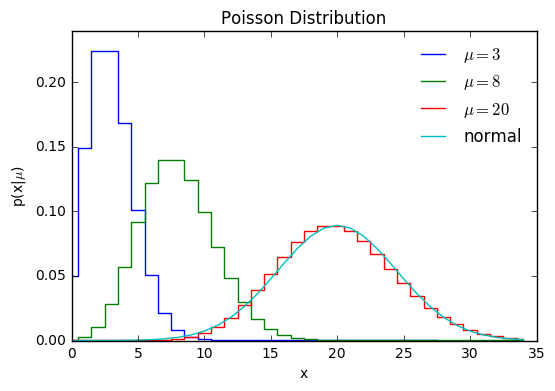

In [11]:
mu_values = [3, 8, 20]
x = np.arange(0, 35)
    
for mu in mu_values:
    dist = stats.poisson(mu)
    plt.plot(x, dist.pmf(x), label=r'$\mu=%i$' % mu, linestyle='steps-mid')

# plot a normal distribution for comparison
dist = stats.norm(mu, np.sqrt(mu))
plt.plot(x, dist.pdf(x), label='normal')
    
plt.xlim(0, 35)
plt.ylim(0, 0.24)
plt.xlabel('x')
plt.ylabel('p(x|$\mu$)')
plt.title('Poisson Distribution')
plt.legend(frameon=False)
plt.show()

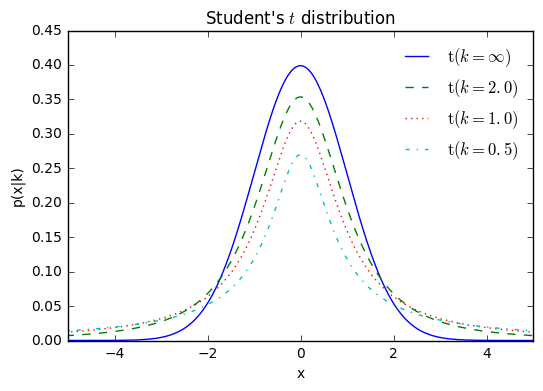

In [12]:
mu = 0
k_values = [1E10, 2, 1, 0.5]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(-10, 10, 1000)

for k, ls in zip(k_values, linestyles):
    dist = stats.t(k, 0)

    if k >= 1E10:
        label = r'$\mathrm{t}(k=\infty)$'
    else:
        label = r'$\mathrm{t}(k=%.1f)$' % k

    plt.plot(x, dist.pdf(x), ls=ls, label=label)

plt.xlim(-5, 5)
plt.ylim(0.0, 0.45)

plt.xlabel('x')
plt.ylabel('p(x|k)')
plt.title("Student's $t$ distribution")
plt.legend(frameon=False)
plt.show()

#### Quantifying differences between samples

Not let's take some real data.  File <b>gc.dat</b> (located in Canvas/Files/Data files) contains measurements of three properties of old massive star clusters in our Galaxy: <i>metallicity</i> (which is the log10 of the ratio of iron abundance to its value in the Sun), <i>mass</i> (in units of solar mass), and <i>distance from the center of the Galaxy</i> (in kpc).

All three variables belong to a given object.  So if we select a subset of objects, we pick all three numbers together.  Let's split the sample in two parts, based on the threshold value of metallicity of -1.

In [13]:
feh, m, d = np.loadtxt("gc.dat", unpack=True)

lgm = np.log10(m)
lgd = np.log10(d)

feh_th = -1.0

feh1 = feh[feh < feh_th]
lgm1 = lgm[feh < feh_th]
lgd1 = lgd[feh < feh_th]

feh2 = feh[feh >= feh_th]
lgm2 = lgm[feh >= feh_th]
lgd2 = lgd[feh >= feh_th]

# calculate basic statistics
print "  M median mean st_dev:", np.log10(np.median(m)), np.log10(np.mean(m)), np.log10(np.std(m))
print "lgM median mean st_dev:", np.median(lgm), np.mean(lgm), np.std(lgm)

print "[Fe/H]: ", np.median(feh1), np.mean(feh1), np.std(feh1)
print "[Fe/H]: ", np.median(feh2), np.mean(feh2), np.std(feh2)

print "lgM: ", np.median(lgm1), np.mean(lgm1), np.std(lgm1)
print "lgM: ", np.median(lgm2), np.mean(lgm2), np.std(lgm2)

print "lgd: ", np.median(lgd1), np.mean(lgd1), np.std(lgd1)
print "lgd: ", np.median(lgd2), np.mean(lgd2), np.std(lgd2)

  M median mean st_dev: 5.34044411484 5.56816625981 5.6831071906
lgM median mean st_dev: 5.34044411484 5.25388041237 0.598619541378
[Fe/H]:  -1.58 -1.61704081633 0.305300819145
[Fe/H]:  -0.58 -0.565581395349 0.262380004251
lgM:  5.3718724393 5.30178663167 0.575831170252
lgM:  5.20139712432 5.14469879628 0.634185195042
lgd:  0.87031514518 0.912403836913 0.490104975363
lgd:  0.496929648073 0.502972975197 0.329249354213


The significance of a difference of means of two samples is measured by Student’s <i>t</i>-distribution.

In [14]:
dxA = np.std(lgm2)/np.sqrt(len(lgm2))
dxB = np.std(lgm1)/np.sqrt(len(lgm1))
t = (np.mean(lgm2)-np.mean(lgm1))/np.sqrt(dxA**2 + dxB**2)
nu = (dxA**2 + dxB**2)**2/(dxA**4/(len(lgm2)-1.) + dxB**4/(len(lgm1)-1.))
print "M: t=",t," P=",stats.t.cdf(t,nu)*2

dxA = np.std(lgd2)/np.sqrt(len(lgd2))
dxB = np.std(lgd1)/np.sqrt(len(lgd1))
t = (np.mean(lgd2)-np.mean(lgd1))/np.sqrt(dxA**2 + dxB**2)
nu = (dxA**2 + dxB**2)**2/(dxA**4/(len(lgd2)-1.) + dxB**4/(len(lgd1)-1.))
print "d: t=",t," P=",stats.t.cdf(t,nu)*2

M: t= -1.3919160958  P= 0.168133877193
d: t= -5.80644968244  P= 5.68022700525e-08


#### Kolmogorov-Smirnov test

In [15]:
D, p = stats.ks_2samp(lgm1, lgm2)
print "M: D_KS= ", D, " P_KS= ", p
D, p = stats.ks_2samp(lgd1, lgd2)
print "d: D_KS= ", D, " P_KS= ", p

M: D_KS=  0.143094447081  P_KS=  0.540360300793
d: D_KS=  0.420028476507  P_KS=  3.04399270315e-05


#### Correlation coefficients

In [16]:
r, p = stats.pearsonr(m, feh)
print "Pearson r, p:", r, p
rs, p = stats.spearmanr(m, feh)
print "Spearman r, p:", rs, p

Pearson r, p: -0.0628142430524 0.459318533967
Spearman r, p: -0.0465705009013 0.583438431423
